### Importing Labraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Loading and Understanding Dataset

In [ ]:
news_dataset = pd.read_csv('/content/fake_news_data.csv');

In [ ]:
news_dataset.shape

(20800, 5)

In [ ]:
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
news_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [ ]:
news_dataset.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


### Data Pre-processing 

In [ ]:
news_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
#filling null values with empty string 
news_dataset = news_dataset.fillna('')

In [ ]:
news_dataset['content'] = news_dataset['author'] + ' ' + news_dataset['title']

In [ ]:
print(news_dataset['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


### stemming : process of reducing a word to it's root word 

In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [ ]:
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [ ]:
print(news_dataset['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [ ]:
news_dataset.isnull().sum()

id         0
title      0
author     0
text       0
label      0
content    0
dtype: int64

In [ ]:
# seprating data and label
X = news_dataset['content'].values
Y = news_dataset['label'].values


In [ ]:
#converting testual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

# Spliting the dataset to training & testing data

In [ ]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

In [ ]:
#Target variable
print(Y)


[1 0 1 ... 0 1 1]


1--> Fake
0-->Real


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Training the Model

###1-Logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import classification_report

from mlxtend.plotting import plot_confusion_matrix

In [ ]:
LR_model= LogisticRegression()
LR_model.fit(X_train, Y_train)

LogisticRegression()

### Evaluation


In [ ]:
#Accuracy score on training data
X_train_prediction1= LR_model.predict(X_train)
training_data_accuracy= accuracy_score(X_train_prediction1, Y_train)
training_data_accuracy

0.9865985576923076

In [ ]:
#Accuracy on test data
X_test_prediction1= LR_model.predict(X_test)
test_data_accuracy= accuracy_score(X_test_prediction1, Y_test)
test_data_accuracy

0.9790865384615385

In [ ]:
Y_pred1= LR_model.predict(X_test)
Y_pred1

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
print(classification_report(Y_test, Y_pred1))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2077
           1       0.97      0.99      0.98      2083

    accuracy                           0.98      4160
   macro avg       0.98      0.98      0.98      4160
weighted avg       0.98      0.98      0.98      4160



<Figure size 432x288 with 0 Axes>

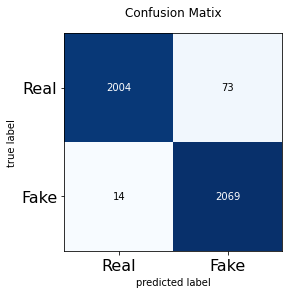

In [ ]:
cm= confusion_matrix(Y_test, X_test_prediction1)
plt.figure()
plot_confusion_matrix(cm, figsize=(5, 4), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Confusion Matix")
plt.xticks(range(2), ["Real", "Fake"], fontsize=16)
plt.yticks(range(2), ["Real", "Fake"], fontsize=16)
plt.show()

### 2- Naive Bayes classifier Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_model= MultinomialNB()
naive_model.fit(X_train, Y_train)


MultinomialNB()

### Evaluation

In [ ]:
#Accuracy score on training data
X_train_prediction2= naive_model.predict(X_train)
training_data_accuracy= accuracy_score(X_train_prediction2, Y_train)
training_data_accuracy

0.9782451923076924

In [ ]:
#Accuracy score on testing data
X_test_prediction2= naive_model.predict(X_test)
test_data_accuracy= accuracy_score(X_test_prediction2, Y_test)
test_data_accuracy

0.9550480769230769

In [ ]:
Y_pred2= naive_model.predict(X_test)
Y_pred2

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
print(classification_report(Y_test, Y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      2077
           1       0.99      0.92      0.95      2083

    accuracy                           0.96      4160
   macro avg       0.96      0.96      0.95      4160
weighted avg       0.96      0.96      0.95      4160



<Figure size 432x288 with 0 Axes>

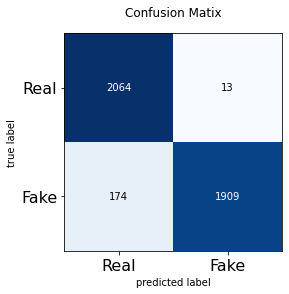

In [ ]:
#confusion matrix
cm= confusion_matrix(Y_test, X_test_prediction2)
plt.figure()
plot_confusion_matrix(cm, figsize=(5, 4), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Confusion Matix")
plt.xticks(range(2), ["Real", "Fake"], fontsize=16)
plt.yticks(range(2), ["Real", "Fake"], fontsize=16)
plt.show()

### 3- SVM Model

In [ ]:
from sklearn.svm import SVC
svm_model= SVC(C=0.5, kernel='linear')
svm_model.fit(X_train, Y_train)

SVC(C=0.5, kernel='linear')

### Evaluation

In [ ]:
#Accuracy score on training data
X_train_prediction3= svm_model.predict(X_train)
training_data_accuracy= accuracy_score(X_train_prediction3, Y_train)
training_data_accuracy

0.9934495192307692

In [ ]:
#Accuracy score on testing data
X_test_prediction3= svm_model.predict(X_test)
test_data_accuracy= accuracy_score(X_test_prediction3, Y_test)
test_data_accuracy

0.9870192307692308

In [ ]:
Y_pred3= svm_model.predict(X_test)
Y_pred3

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
print(classification_report(Y_test, Y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      2077
           1       0.99      0.92      0.95      2083

    accuracy                           0.96      4160
   macro avg       0.96      0.96      0.95      4160
weighted avg       0.96      0.96      0.95      4160



<Figure size 432x288 with 0 Axes>

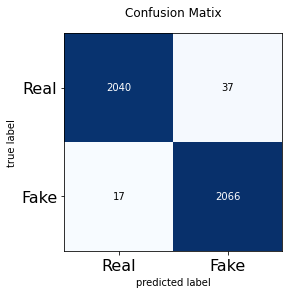

In [ ]:
#confusion matrix
cm= confusion_matrix(Y_test, X_test_prediction3)
plt.figure()
plot_confusion_matrix(cm, figsize=(5, 4), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Confusion Matix")
plt.xticks(range(2), ["Real", "Fake"], fontsize=16)
plt.yticks(range(2), ["Real", "Fake"], fontsize=16)
plt.show()

# Final Models results


In [ ]:
model_result= pd.DataFrame({"Models" : ['LogisticRegressionModel', 'NaiveByesModel', 'SVMModel'], 
      
        'ACC': [accuracy_score(X_test_prediction1, Y_test), 
                accuracy_score(X_test_prediction2, Y_test), 
                accuracy_score(X_test_prediction3, Y_test)
                ],
        'f1-score': [f1_score(Y_test, X_test_prediction1),
                       f1_score(Y_test, X_test_prediction2),
                       f1_score(Y_test, X_test_prediction3)],
        'precision': [precision_score(Y_test, X_test_prediction1),
                      precision_score(Y_test, X_test_prediction2),
                      precision_score(Y_test, X_test_prediction3)],
         'Recall': [recall_score(Y_test, X_test_prediction1),
                    recall_score(Y_test, X_test_prediction2),
                      recall_score(Y_test, X_test_prediction3)]})

model_result

,Models,ACC,f1-score,precision,Recall
0,LogisticRegressionModel,0.979087,0.979408,0.965920,0.993279
1,NaiveByesModel,0.955048,0.953308,0.993236,0.916467
2,SVMModel,0.987019,0.987100,0.982406,0.991839


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


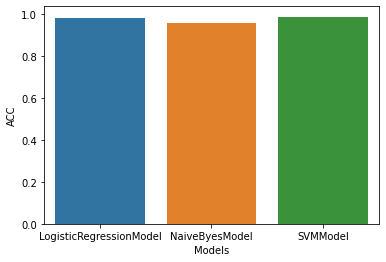

In [ ]:
sns.barplot(model_result['Models'], model_result['ACC'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


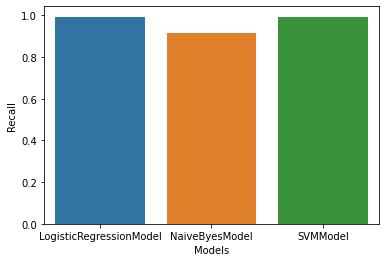

In [ ]:
sns.barplot(model_result['Models'], model_result['Recall'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


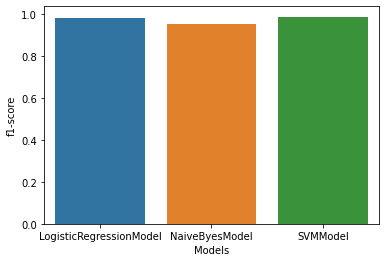

In [ ]:
sns.barplot(model_result['Models'], model_result['f1-score'])

# Making New data Prediction

In [ ]:
New_data= X_test[3:6]

prediction= svm_model.predict(New_data)
print(prediction)
for i in range(3):
  if prediction[i]==0: 
    print(prediction[i],'-> Real News');
  else:
    print(prediction[i],'-> Fake News');



[0 0 1]
0 -> Real News
0 -> Real News
1 -> Fake News
